## Advanced Visualisation

It is time to visualise and organise data into graphs. We have already done this of course but in this session we take a more systematic look.

First we load the libraries always need. Run the code below.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Seaborn is a more recent Python data visualization library based on Matplotlib. According to https://seaborn.pydata.org/, it 'provides a high-level interface for drawing attractive and informative statistical graphics.' It integrates easily with Pandas and provides an easier to use set of more high-level functions. So, load the library with `import seaborn as sns`.

In [2]:
import seaborn as sns

In the session, we look at museums and how to get a job as an analyst there. Several arts museums around the world publish their collections’ metadata online. Very popular is, for instance, New York’s Museum of Modern Art (MoMA) collection data (https://github.com/MuseumofModernArt/collection). Let us take a look at their artworks’ information. Please note that this data is refreshed monthly and fairly large with over 50 MB at the time of writing. So, if you download it now you might see some differences to our suggested data frame moma_artworks, which is just a sample. 

Run the code below.

In [3]:
moma_art = pd.read_csv("https://tinyurl.com/bdyxhcj9", index_col=False)

Type in `moma_artworks.head()` to take a look at the first rows. For the rest of the MoMA exercises, we take inspiration from http://sebastianbarfort.github.io/ who many years ago came up with this task.

In this part, let’s pretend you work for MoMA, and your manager has asked you to create a visualisation showcasing the development of the museum stock. Next to the moma_artworks, we have also created the moma_stock dataframe. We would like to know how the stock has developed in recent years and visualise it. 

Run the next code and observe the argument parse_date which allows you to specify which columns should be parsed for the date format.

In [4]:
moma_stock = pd.read_csv("https://tinyurl.com/y2cj56vh", parse_dates=['date'])

Check out the first few records of moma_stock.

Next, we draw a simple line to represent the stock development. 

Try whether you can use Searborn's sns.lineplot with moma_stock. x='date' and y='stock'. Run `sns.lineplot(data=moma_stock, x='date', y='stock')`.

There is a definite jump in holdings from the late 1960s onwards. Or is this simply a recording issue? We cannot know  and would have to do further research. 

Let’s investigate the development of MoMA departments next. moma_departments contains the stocks per department. Run the code.

In [5]:
moma_dep = pd.read_csv("https://tinyurl.com/yskza22e", parse_dates=['date'])
moma_dep.head()

,date,Department,supply,stock
0,1932-01-01,Architecture & Design,2,2
1,1934-01-01,Architecture & Design,2,4
2,1934-04-01,Architecture & Design,43,47
3,1934-09-01,Architecture & Design,4,51
4,1935-11-01,Architecture & Design,22,73


Let's plot the development of the stock of each department by setting a different color for each department by using hue='Department'. Type in `sns.lineplot(data=moma_dep, x='date', y='stock', hue='Department')`.

Well done! But you are rather nervous about showing this to your manager, the legend is covering most of the view of the plot, which makes it a bit messy. You would like to change the look and feel a bit.

Seaborn has five built-in themes to style its plots: darkgrid, whitegrid, dark, white, and ticks: http://seaborn.pydata.org/tutorial/aesthetics.html. Seaborn defaults to using the darkgrid theme for its plots, but you can change this styling to better suit your presentation needs.

To use any of the preset themes pass its name to sns.set_style().
(https://www.codecademy.com/articles/seaborn-design-i)

However, these do not include the possibility to change the background colour, which we want to do. For this, we need to use the built-in styles of matplotlib, plt.style.use(). Run: `plt.style.use('dark_background')`.

Now run the lineplot again with date and stock and hue='Department': `sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')`.

The background is black, but the position of the legend seems to be even worse now. Luckily, we can also change this using matplotlib's plt.legend(), where we use the argument bbox_to_anchor=(1.01, 1) to tell it the coordinates of where the legend needs to go. Finding the correct coordinates is a bit of trial and error, which we have already done for you ...

Run this code and observe how you can compose a graphics from different elements:
```
sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')
plt.legend(bbox_to_anchor=(1.01, 1))
```

Hmm, it still doesn't look completely right, the size of the labels on the x-axis seem a little bit too big. Let's change this as well using Matplotlib's tick_params() because we can. Run the code below and observe again how we incrementally can add more and more elements to the graph until we get it right.

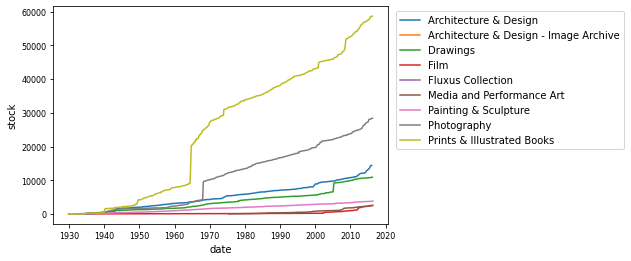

In [6]:
sns.lineplot(data=moma_dep,x='date', y='stock', hue='Department')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.tick_params(labelsize=8)

Your manager likes it! 

Before we continue, we need to reset the style to default to avoid using dark backgrounds for the rest of the session. Run `plt.style.use('default')`.

After your success at MoMA, why not start at the TATE-galleries in Britain? Your first task is to compare visitor numbers. You have been given a data frame tate_attendance. Run the next cell.

In [7]:
tate_attendance = pd.read_csv("https://tinyurl.com/5n7ca2ea")
tate_attendance.head(20)

,year,gallery,visitors
0,2006,Britain,1665
1,2007,Britain,1533
2,2008,Britain,1587
3,2009,Britain,1576
4,2010,Britain,1606
5,2011,Britain,1465
6,2012,Britain,1396
7,2013,Britain,1419
8,2014,Britain,1373
9,2015,Britain,1273


tate_attendance obviously contains the visitor numbers since 2006 for all TATE-galleries in Britain. You are eager to plot the data in order to compare visitor developments. You heard that the wonderful area plots would do a great job at it. There is no seaborn area plot but Matplotlib has one: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html

You soon realise that there is an issue with the format. It has been created as ‘tidy data’, as defined by Hadley Wickham in the Journal of Statistical Software (https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf). In tidy data, each row is an observation and each column contains the values of a variable (i.e. an attribute of what we are observing). It is also called narrow format as in https://en.wikipedia.org/wiki/Wide_and_narrow_data (sometimes this distinction is also called long and wide to make it even more confusing). 

Matplotlib's area plot requires wide data. So, you need to transform the data. This is easily done in Python with pivot, which takes: an index to use (in this case the year); columns, which define where the names of the new wide columns are found; and the values to put in the cells. Run:

```
tate_wide = tate_attendance.pivot(index='year', columns = 'gallery', values='visitors')
tate_wide.head()
```

Pivotting and its opposite called 'melting' (check out the Pandas 'melt' function) require some practice but are essential skills. So, spend some time after this session on the documentation. Here is the cheat sheet: http://datacamp-community-prod.s3.amazonaws.com/d4efb29b-f9c6-4f1c-8c98-6f568d88b48f

You are almost there. Creating the plot is easy now with `tate_wide.plot(kind='area')`.

Success! We have made great progress in the art of plotting.